# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./data/Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size,random_seed=0,num_agents=num_agents)

In [6]:
from collections import deque
import torch

In [7]:
def ddpg(n_episodes=2000, n_trajectories=10000, queue=100):
    scores_window = deque(maxlen=queue)
    scores_all = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        t=0
        while True:
            actions = agent.act(states)                        # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
            t+=1
            print('\rTrajectory {}\tAverage Score: {:.2f} '.format(t, np.mean(scores)), end="")
        scores_window.append(np.mean(scores))
        scores_all.append(np.mean(scores))
        
        print('Episode {} ... Reward: {:.3f} ... Average Reward: {:.3f}'.format(i_episode, np.mean(scores), np.mean(scores_window)))

        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_single.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_single.pth')
            break

    return scores_all

In [8]:
%%time
scores = ddpg()

Trajectory 1000	Average Score: 0.35 Episode 1 ... Reward: 0.350 ... Average Reward: 0.350
Trajectory 1000	Average Score: 3.55 Episode 2 ... Reward: 3.550 ... Average Reward: 1.950
Trajectory 1000	Average Score: 0.15 Episode 3 ... Reward: 0.150 ... Average Reward: 1.350
Trajectory 1000	Average Score: 0.21 Episode 4 ... Reward: 0.210 ... Average Reward: 1.065
Trajectory 1000	Average Score: 0.27 Episode 5 ... Reward: 0.270 ... Average Reward: 0.906
Trajectory 1000	Average Score: 0.00 Episode 6 ... Reward: 0.000 ... Average Reward: 0.755
Trajectory 1000	Average Score: 0.83 Episode 7 ... Reward: 0.830 ... Average Reward: 0.766
Trajectory 1000	Average Score: 0.53 Episode 8 ... Reward: 0.530 ... Average Reward: 0.736
Trajectory 1000	Average Score: 0.71 Episode 9 ... Reward: 0.710 ... Average Reward: 0.733
Trajectory 1000	Average Score: 0.46 Episode 10 ... Reward: 0.460 ... Average Reward: 0.706
Trajectory 1000	Average Score: 1.34 Episode 11 ... Reward: 1.340 ... Average Reward: 0.764
Trajecto

Trajectory 1000	Average Score: 4.07 Episode 91 ... Reward: 4.070 ... Average Reward: 2.681
Trajectory 1000	Average Score: 3.43 Episode 92 ... Reward: 3.430 ... Average Reward: 2.689
Trajectory 1000	Average Score: 5.77 Episode 93 ... Reward: 5.810 ... Average Reward: 2.723
Trajectory 1000	Average Score: 2.44 Episode 94 ... Reward: 2.440 ... Average Reward: 2.720
Trajectory 1000	Average Score: 4.42 Episode 95 ... Reward: 4.420 ... Average Reward: 2.738
Trajectory 1000	Average Score: 3.84 Episode 96 ... Reward: 3.840 ... Average Reward: 2.749
Trajectory 1000	Average Score: 3.08 Episode 97 ... Reward: 3.080 ... Average Reward: 2.753
Trajectory 1000	Average Score: 5.95 Episode 98 ... Reward: 5.950 ... Average Reward: 2.785
Trajectory 1000	Average Score: 3.92 Episode 99 ... Reward: 3.920 ... Average Reward: 2.797
Trajectory 1000	Average Score: 5.40 Episode 100 ... Reward: 5.420 ... Average Reward: 2.823
Trajectory 1000	Average Score: 3.51 Episode 101 ... Reward: 3.510 ... Average Reward: 2.8

Trajectory 1000	Average Score: 7.36 Episode 180 ... Reward: 7.360 ... Average Reward: 6.712
Trajectory 1000	Average Score: 6.84 Episode 181 ... Reward: 6.840 ... Average Reward: 6.749
Trajectory 1000	Average Score: 12.43 Episode 182 ... Reward: 12.470 ... Average Reward: 6.846
Trajectory 1000	Average Score: 10.14 Episode 183 ... Reward: 10.140 ... Average Reward: 6.900
Trajectory 1000	Average Score: 19.98 Episode 184 ... Reward: 19.980 ... Average Reward: 7.025
Trajectory 1000	Average Score: 14.35 Episode 185 ... Reward: 14.350 ... Average Reward: 7.149
Trajectory 1000	Average Score: 14.16 Episode 186 ... Reward: 14.160 ... Average Reward: 7.224
Trajectory 1000	Average Score: 13.98 Episode 187 ... Reward: 13.980 ... Average Reward: 7.329
Trajectory 1000	Average Score: 16.21 Episode 188 ... Reward: 16.210 ... Average Reward: 7.444
Trajectory 1000	Average Score: 11.89 Episode 189 ... Reward: 11.890 ... Average Reward: 7.523
Trajectory 1000	Average Score: 18.44 Episode 190 ... Reward: 18.

Trajectory 1000	Average Score: 22.93 Episode 267 ... Reward: 22.970 ... Average Reward: 14.940
Trajectory 1000	Average Score: 9.72 Episode 268 ... Reward: 9.720 ... Average Reward: 14.958
Trajectory 1000	Average Score: 26.41 Episode 269 ... Reward: 26.410 ... Average Reward: 15.085
Trajectory 1000	Average Score: 13.38 Episode 270 ... Reward: 13.390 ... Average Reward: 15.078
Trajectory 1000	Average Score: 13.99 Episode 271 ... Reward: 13.990 ... Average Reward: 15.117
Trajectory 1000	Average Score: 19.30 Episode 272 ... Reward: 19.340 ... Average Reward: 15.140
Trajectory 1000	Average Score: 21.13 Episode 273 ... Reward: 21.160 ... Average Reward: 15.271
Trajectory 1000	Average Score: 23.24 Episode 274 ... Reward: 23.240 ... Average Reward: 15.404
Trajectory 1000	Average Score: 11.17 Episode 275 ... Reward: 11.170 ... Average Reward: 15.390
Trajectory 1000	Average Score: 17.35 Episode 276 ... Reward: 17.350 ... Average Reward: 15.448
Trajectory 1000	Average Score: 29.35 Episode 277 ...

Trajectory 1000	Average Score: 29.15 Episode 353 ... Reward: 29.190 ... Average Reward: 21.338
Trajectory 1000	Average Score: 15.89 Episode 354 ... Reward: 15.890 ... Average Reward: 21.342
Trajectory 1000	Average Score: 14.37 Episode 355 ... Reward: 14.370 ... Average Reward: 21.193
Trajectory 1000	Average Score: 36.37 Episode 356 ... Reward: 36.410 ... Average Reward: 21.280
Trajectory 1000	Average Score: 30.74 Episode 357 ... Reward: 30.740 ... Average Reward: 21.399
Trajectory 1000	Average Score: 18.36 Episode 358 ... Reward: 18.360 ... Average Reward: 21.387
Trajectory 1000	Average Score: 14.66 Episode 359 ... Reward: 14.660 ... Average Reward: 21.320
Trajectory 1000	Average Score: 21.23 Episode 360 ... Reward: 21.270 ... Average Reward: 21.315
Trajectory 1000	Average Score: 20.68 Episode 361 ... Reward: 20.720 ... Average Reward: 21.197
Trajectory 1000	Average Score: 22.75 Episode 362 ... Reward: 22.750 ... Average Reward: 21.227
Trajectory 1000	Average Score: 27.69 Episode 363 .

Trajectory 1000	Average Score: 35.35 Episode 439 ... Reward: 35.390 ... Average Reward: 28.877
Trajectory 1000	Average Score: 28.12 Episode 440 ... Reward: 28.160 ... Average Reward: 28.964
Trajectory 1000	Average Score: 19.75 Episode 441 ... Reward: 19.790 ... Average Reward: 28.797
Trajectory 1000	Average Score: 36.65 Episode 442 ... Reward: 36.690 ... Average Reward: 28.983
Trajectory 1000	Average Score: 33.22 Episode 443 ... Reward: 33.220 ... Average Reward: 29.138
Trajectory 1000	Average Score: 32.63 Episode 444 ... Reward: 32.670 ... Average Reward: 29.156
Trajectory 1000	Average Score: 24.66 Episode 445 ... Reward: 24.700 ... Average Reward: 29.210
Trajectory 1000	Average Score: 31.60 Episode 446 ... Reward: 31.640 ... Average Reward: 29.395
Trajectory 1000	Average Score: 32.81 Episode 447 ... Reward: 32.850 ... Average Reward: 29.549
Trajectory 1000	Average Score: 37.28 Episode 448 ... Reward: 37.320 ... Average Reward: 29.662
Trajectory 1000	Average Score: 32.91 Episode 449 .

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import pandas as pd

In [22]:
rolling_window_scores = pd.Series(scores).rolling(20).mean()

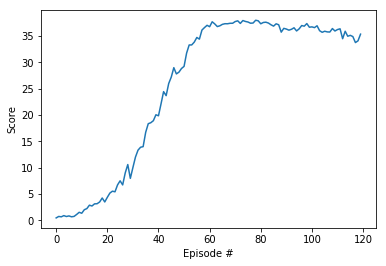

In [23]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
#ax.plot(rolling_window_scores, "-", c="red", linewidth=1)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch the Smart Agent Run!

In [9]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_single.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_single.pth'))

env_info = env.reset(train_mode=False)[brain_name]        
states = env_info.vector_observations                  
scores = np.zeros(num_agents)                          

for i in range(500):
    actions = agent.act(states, add_noise=False)                    
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    rewards = env_info.rewards                        
    dones = env_info.local_done                 
    scores += rewards                         
    states = next_states                              
    if np.any(dones):                              
        break

In [10]:
env.close()